### Todo:

##### Task 1:

Check how driver drives at different times spans of the day. Make comparisons between different days during same hours. This will tell us if the time of the day makes a difference in the avg. driving speed(kph) i.e how time of the day effects the driving speed.


##### Task 2:

1) Check the performances of providers and find out which provider has worst or better performance with respect to mapMatching values.

2) Find the reason for why one of the providers is the worst amongst the others.


##### Task 3:

Calculate additional features from the given features. ( TimeDiff & RoadLength )

##### Task 4:

Try to predict the missing MapMatching values

Steps:

1) Convert timestamp to unix timestamp

2) train the model on the timediff, speed, roadlength  and data providers as features.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import datashader as ds
from collections import OrderedDict
import datashader.transfer_functions as tf
%matplotlib inline

In [8]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y.%m.%d_%H:%M:%S')
df = pd.read_csv("./example3.csv", parse_dates=[0], header=None, date_parser=dateparse, index_col=0)
df

,1,2,3
0,,,
2017-11-15 17:19:56,30.25,10,0
2017-11-15 17:17:13,7.66,--,1
2017-11-15 17:15:27,32.75,--,2
2017-11-15 17:15:21,38.25,14,3
2017-11-15 17:13:52,29.38,--,1
2017-11-15 17:13:31,38.75,--,1
2017-11-15 17:11:55,23.75,--,1
2017-11-15 17:11:46,39.75,--,1
2017-11-15 17:10:30,13.88,--,1


###### Unique Days

In [130]:
len(df.index.map(lambda t: t.date()).unique())

1050

## Task 1 (Solution):

<font color='green'>


</font>

Finding the worst provider with maximum -- values in the dataset.

<font color='green'>We come to conclude that the worst provider is provider 1</font> 

Now we'll try to figure out why ?

In [200]:
df_no_dash = df.replace('--',np.NaN)
df_no_dash = df_no_dash[df_no_dash[2].isnull()].groupby(3)[1].count().reset_index()
df_no_dash

,3,1
0,1,191518
1,2,121152
2,3,1303
3,4,79506
4,5,27622
5,6,46855
6,7,1234
7,8,13470
8,9,671
9,10,148


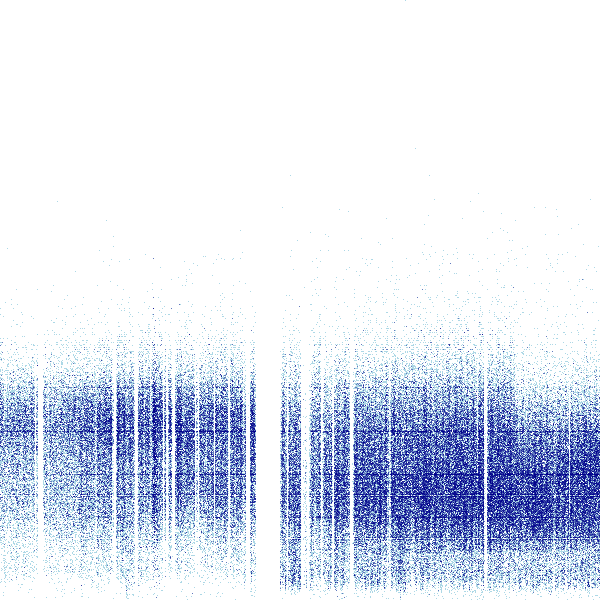

In [14]:

df_prov_1 = df[df[3] == 1]
df_prov_1 = df_prov_1.rename(index=str, columns={1:"Speed", 2:"MapM", 3:"Provider"})
df_prov_1.index = pd.to_datetime(df_prov_1.index)
df_prov_1.index = [t.value // 10 ** 9 for t in df_prov_1.index]
df_prov_1.loc[:,'Time'] = df_prov_1.index
df_prov_1 = df_prov_1.replace('--',np.NaN)

df_with_dash = df_prov_1[df_prov_1['MapM'].isnull()]
df_without_dash = df_prov_1.dropna()

tf.shade(ds.Canvas().points(df_with_dash,'Time','Speed'))


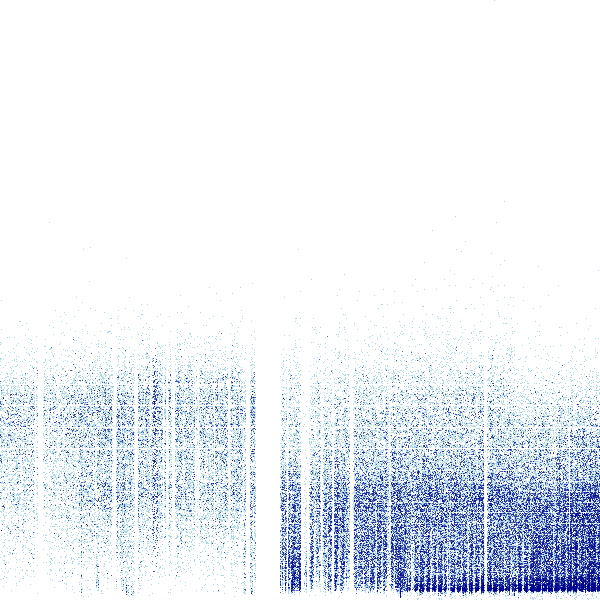

In [15]:
tf.shade(ds.Canvas().points(df_without_dash,'Time','Speed'))

## Task 2 (Solution)


###### divided each day into 4 quaters. 
- q1 = 00:00 to 06:00
- q2 = 06:00 to 12:00
- q3 = 12:00 to 18:00
- q4 = 18:00 to 23:00

###### And than, visualized the distribution of  speed values among different times of the day. The following points can be observed from the results.
<font color='green'>

The plot of q1 suggests most of the people are driving slightly above 40km/h. This is the only quarter where most of the drivers prefer to go around 40km/h or more (on average) while for the other quarters(q2,q3,q4) it can be observed that there are two spikes in the graphs. This can be due to the fact that the other quarters represent more busy parts of the day where drivers can be caused to slow down.</font>

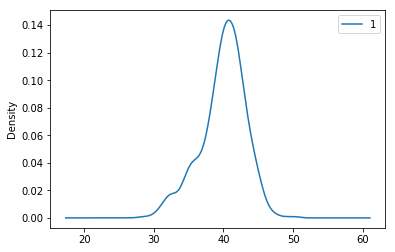

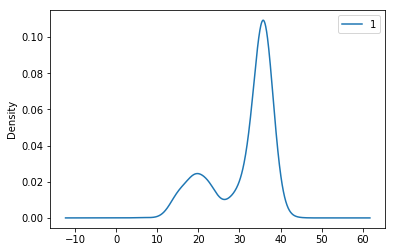

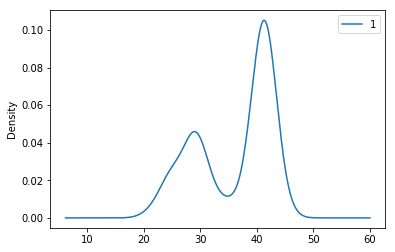

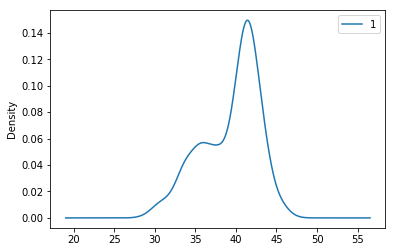

In [169]:
groupedday_hr = df.groupby([df.index.date,df.index.hour])[1].mean()
result = groupedday_hr.reset_index(level=0)

result[2] = np.where((result[0] >= 0) & (result[0] < 6),'q1','q2')
result.loc[(result[0]>=12) & (result[0]<18),2] = 'q3'
result.loc[(result[0]>=18) & (result[0]<24),2] = 'q4'

## now we group w.r.t dates and quartes and find out how drivers drove every day on those specific quarters.
quarters_avg_speed = result.groupby([result.index,result[2]])[1].mean().reset_index(level=1)
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q1'].plot.kde()
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q2'].plot.kde()
quarters_avg_speed.loc[quarters_avg_speed[2] == 'q3'].plot.kde()

quarters_avg_speed.loc[quarters_avg_speed[2] == 'q4'].plot.kde()

## Task 3 (Solution)


<font color='green'>

We calculate additional feature i.e the <b>time difference</b> from the last reading to the current reading. This additional feature will be a good use to find patterns in data to train a machine learning model for prediction of MapMatching values. This will also ensure a feature with values repeating in a certain range whereas the timestamp contains unique values for each sample which doesn't tells us much.
</font>

In [21]:
# step (1)
df2 = pd.DataFrame(df.index)
# df.index = [t.value // 10 ** 9 for t in df.index]

df2[0] = df2.diff(periods=-1)
df2.index = df.index
df3 = pd.merge(df2,df,on=df2.index)
df3 = df3.rename(index=str, columns={"key_0": "Timestamp", 0: "TimeDiff", 1:"Speed", 2:"MapM", 3:"Provider"})
df3

,Timestamp,TimeDiff,Speed,MapM,Provider
0,1510766396,163.0,30.25,10,0
1,1510766233,106.0,7.66,--,1
2,1510766127,6.0,32.75,--,2
3,1510766121,89.0,38.25,14,3
4,1510766032,21.0,29.38,--,1
5,1510766011,96.0,38.75,--,1
6,1510765915,9.0,23.75,--,1
7,1510765906,76.0,39.75,--,1
8,1510765830,6.0,13.88,--,1
9,1510765824,170.0,8.25,16,1


In [22]:
# step (3.1) - first take the records on for which you have MapM value
df4 = df3.replace('--',np.NaN)
df4['MapM'] = df4['MapM'].apply(pd.to_numeric)

##### Visualizing the correlation matrix plot of found features in a plot
<font color='green'>
We're just visualizing here how different features in the data are correlated to each other. 

Additioanlly,We are calculating a feature called <b>Road Length</b> using a simple speed=distance/time formula to estimate the length of road using the average given speed and the timedifference we calculated previously between the previous and the current reading. 
</font>

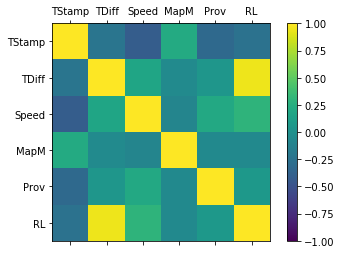

In [23]:
df4 = df4.dropna()
df4['RoadLength'] = df4['TimeDiff'] * df4['Speed']
correlations = df4.corr()
names = ['TStamp','TDiff','Speed', 'MapM','Prov','RL']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

## Task 4 (Solution)
<font color='green'>
    
We use RandomForest to estimate the missing MapM values in our data. Different values of n_estimators are tried and the best one is shown here.</font>

In [123]:
def get_features_labels(data):
    train_features = data.drop(['MapM','Timestamp'],axis=1)
    train_label = data['MapM']
    return train_features, train_label

train, test = train_test_split(df4, test_size=0.1)
train_features, train_label = get_features_labels(train)

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_label);

#### Prediction Loss (MSE) :

<font color='green'>Find the mean squared error for the above trained RandomForest algorithm</font>

In [125]:
test_features, test_label = get_features_labels(test)

predictions = rf.predict(test_features)

squared_error = mean_squared_error(predictions,test_label.values)
squared_error

64.75308193259312

In [45]:
# Constants
n = df_with_dash['Speed'].count()    # Number of points
start = df_with_dash['Time'].min()                   # Start time
end = df_with_dash['Time'].max()           # End time   

# Generate a fake signal
time = np.linspace(start, end, n)
signal = df_with_dash['Speed']

# Default plot ranges:
x_range = (start, end)
y_range = (signal.min(), signal.max())

print("x_range: {0} y_range: {0}".format(x_range,y_range))

# Create a dataframe
data['Time'] = np.linspace(start, end, n)
data
# data
df7 = pd.DataFrame(data)
# df6.tail()

# %time
# cvs = ds.Canvas(x_range=x_range, y_range=y_range, plot_height=300, plot_width=900)
# aggs= OrderedDict((c, cvs.line(df6, 'Time', c)) for c in cols)
# img = tf.shade(aggs['a'])
# img

x_range: (1451606936, 1510766233) y_range: (1451606936, 1510766233)


ValueError: arrays must all be same length

In [32]:
df_with_dash['Speed'].count()

191518